In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

2025-03-02 13:42:34.308438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


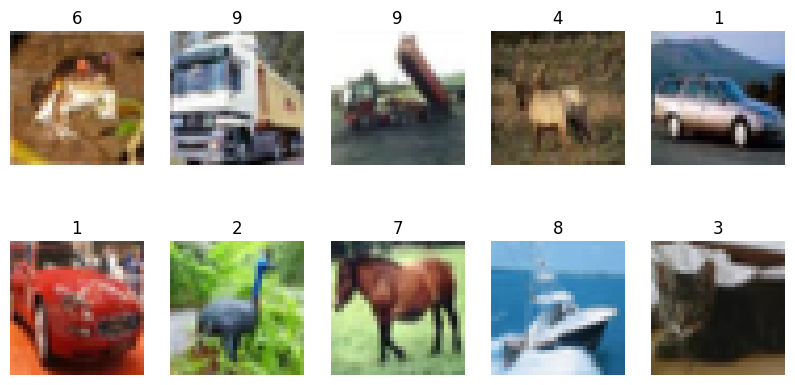

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(y_train[i][0])
    axes[i].axis('off')
plt.show()

# PCA

In [4]:
print(f'Starting shape of Training data: X: {x_train.shape}, Y: {y_train.shape}')
x_train = x_train.astype('float32') / 255

x_train_flattened = x_train.reshape(x_train.shape[0], -1) # 32*32*3 = 3072
print(f'Flattened shape of Training data: X: {x_train_flattened.shape}, Y: {y_train.shape}')

cov_matrix = np.cov(x_train_flattened, rowvar=False)
print(f'Training data covariance matrix shape: {cov_matrix.shape}')

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f'Eigenvalues shape: {eigenvalues.shape}')
print(f'Eigenvectors shape: {eigenvectors.shape}')

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

k = 50
tok_k_eigenvectors = eigenvectors[:, :k]

x_train_pca = x_train_flattened.dot(tok_k_eigenvectors)
print(f'PCA transformed Training data shape: {x_train_pca.shape}')

Starting shape of Training data: X: (50000, 32, 32, 3), Y: (50000, 1)
Flattened shape of Training data: X: (50000, 3072), Y: (50000, 1)
Training data covariance matrix shape: (3072, 3072)
Eigenvalues shape: (3072,)
Eigenvectors shape: (3072, 3072)
PCA transformed Training data shape: (50000, 50)


Text(0.5, 1.0, 'CIFAR-10 dataset in the PCA 2D space')

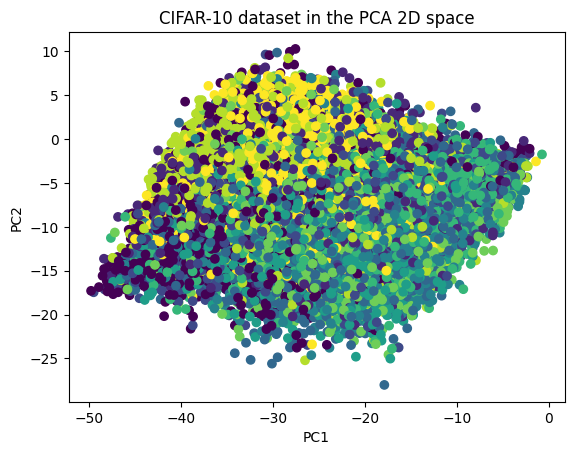

In [5]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('CIFAR-10 dataset in the PCA 2D space')

# KMeans

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(x_train_pca)
y_predPCA = kmeans.predict(x_train_pca)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


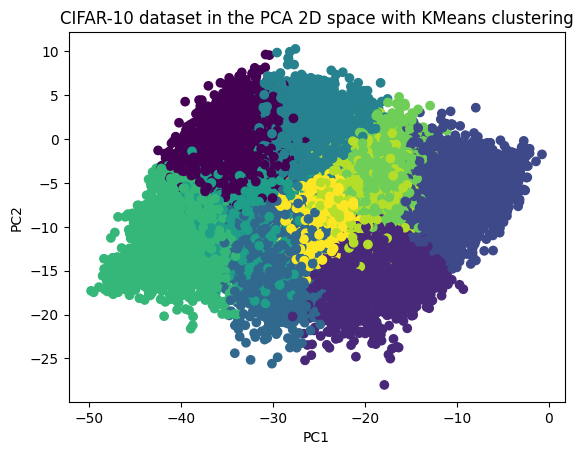

In [7]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_predPCA)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('CIFAR-10 dataset in the PCA 2D space with KMeans clustering')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=100, random_state=0)

kmeans.fit(x_train_pca)
y_predPCA = kmeans.predict(x_train_pca)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


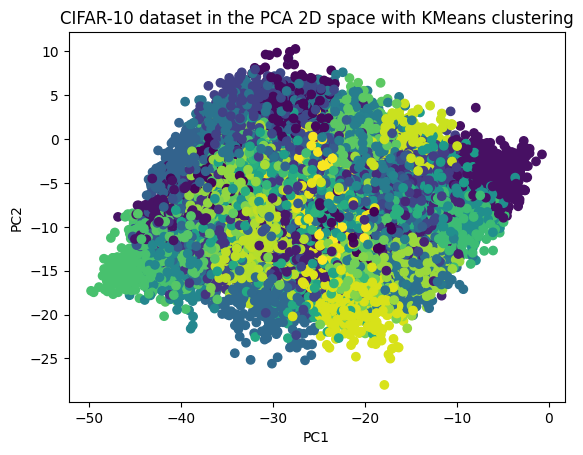

In [9]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_predPCA)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('CIFAR-10 dataset in the PCA 2D space with KMeans clustering')
plt.show()

In [10]:
cluster_indices, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')
print(f'Cluster indices: {cluster_indices}')

There are 100 unique clusters in the auxiliary data
Cluster counts: [ 785  498  528  707  593  263  611  429  668  472  435  486  641  401
  312  352  615  459  894  526  281  795  661  584  496  364  208  344
  632  603  544  423  351  226  271  597  430  455  468  421  304 1159
  559  410  391  444  345  467 1098  519  271  532  268  457  585  410
  513  620  376  208  323  896  563  860  559  279  304  441  559  355
  386  328  733  371  596  227  393  523  527  301  256  446  262  476
  505  492  627  764  496  503  403  534  429  432  434  988  804  396
  783  681]
Cluster indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


# LDA

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f'Starting shape of Training data: X: {x_train.shape}, Y: {y_train.shape}')

x_train = x_train.astype('float32') / 255
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

y_train_flattened = y_train.flatten()
print(f'Flattened shape of Training data: X: {x_train_flattened.shape}, Y: {y_train_flattened.shape}')

lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(x_train_flattened, y_train_flattened)

Starting shape of Training data: X: (50000, 32, 32, 3), Y: (50000, 1)
Flattened shape of Training data: X: (50000, 3072), Y: (50000,)


LinearDiscriminantAnalysis(n_components=3)

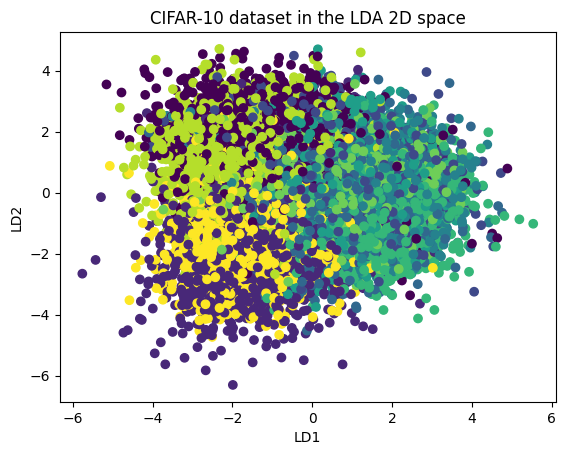

In [12]:
x_train_lda = lda.transform(x_train_flattened)

plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('CIFAR-10 dataset in the LDA 2D space')
plt.show()

# KMeans

In [13]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(x_train_lda)
y_predLDA = kmeans.predict(x_train_lda)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


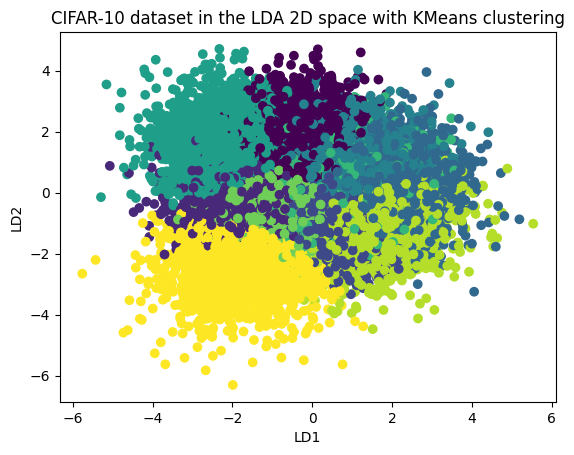

In [14]:
plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_predLDA)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('CIFAR-10 dataset in the LDA 2D space with KMeans clustering')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(x_train_lda)
y_predLDA = kmeans.predict(x_train_lda)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


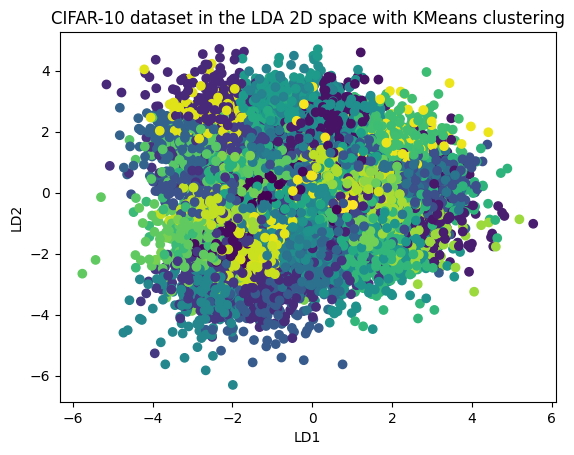

In [16]:
plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_predLDA)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('CIFAR-10 dataset in the LDA 2D space with KMeans clustering')
plt.show()

In [17]:
cluster_indices, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')
print(f'Cluster indices: {cluster_indices}')

There are 100 unique clusters in the auxiliary data
Cluster counts: [ 736  930  509  487  397  389  152  727  262  250  895  234  255  864
  275  241  219  397  577  863  420  670  135  588  416  447  680  222
  133  181  138  256  605  496  944  399  399  353  572  323  629  589
  903  576  208  445  239 1170  387  279  134  844  374  480  318  314
  710  422  653  854  613  333  992  628  200  291  731  199  255  289
  745  243  236  216  605  276  635  764  769  109  519  485  798 1122
  206  651  728  836  909  960  449  545  513  410  236  632  216  880
  132 1080]
Cluster indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


# T-SNE

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(-1)

tsne = TSNE(n_components=2, perplexity=30)
x_train_tsne = tsne.fit_transform(x_train)

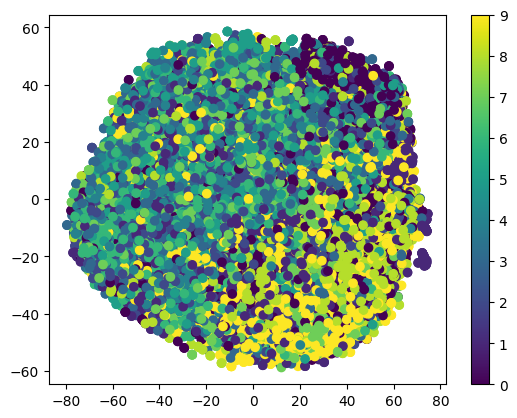

In [19]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.show()


# KMeans

In [20]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(x_train_tsne)
y_predTSNE = kmeans.predict(x_train_tsne)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


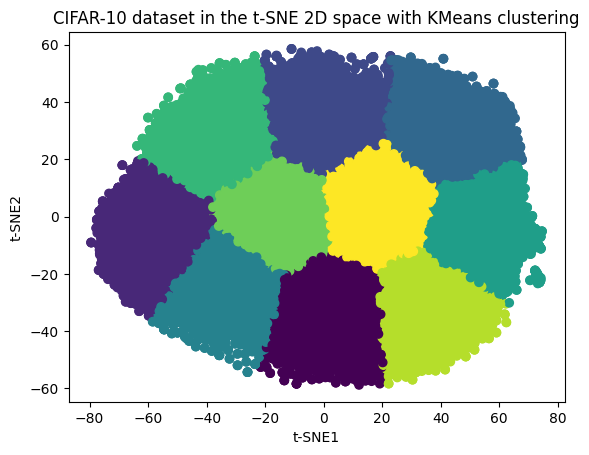

In [21]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_predTSNE)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with KMeans clustering')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(x_train_tsne)
y_predTSNE = kmeans.predict(x_train_tsne)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


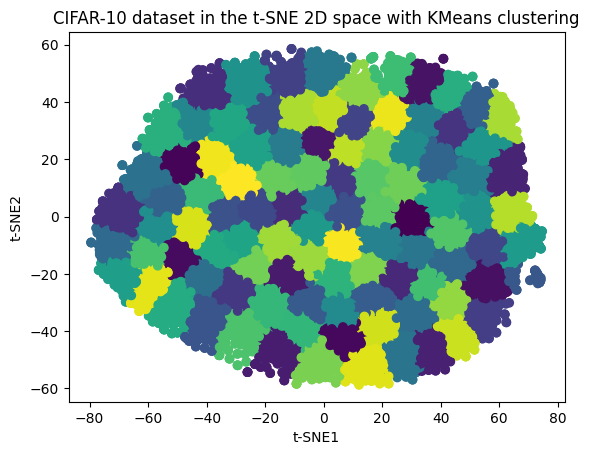

In [23]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_predTSNE)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with KMeans clustering')
plt.show()

In [24]:
cluster_indices, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')
print(f'Cluster indices: {cluster_indices}')

There are 100 unique clusters in the auxiliary data
Cluster counts: [571 481 469 633 598 589 475 523 390 502 469 498 635 503 510 572 554 513
 496 414 396 597 664 519 544 546 386 107 455 466 435 489 542 599 528 594
 565 407 558 484 491 490 428 408 512 544 586 478 544 486 571 438 552 486
 531 559 512 551 616 593 576 419 436 396 622 442 396 558 287 505 509 393
 614 567 472 505 541 544 506 335 420 594 401 544 524 631 569 446 416 436
 458 399 511 550 377 661 322 516 460 490]
Cluster indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
